In [1]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from tqdm import tqdm  # Import tqdm for progress bar

df = pd.read_csv('magnite.csv')

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

class_descriptions = [
    "Climate Control - Heating & Cooling (broken or difficult to use)",
    "Entertainment/Navigation/Connectivity (broken or difficult to use)",
    "Features/Controls/Displays (broken or difficult to use)",
    "Squeaks/Rattles - Water Leaks - Wind/Road Noise",
    "Seats/Seat Adjustment",
    "Interior/Instrument Panel/Material Quality (broken or difficult to use)",
    "Engine, Fuel System and Exhaust",
    "Electric Motor/Battery",
    "Transmission",
    "Drivetrain",
    "All-Wheel/4-Wheel Drive",
    "Body Exterior and Paint",
    "Steering, Handling or Ride",
    "Brakes, Wheels or Tires"
]

class_tokens = tokenizer(class_descriptions, padding=True, truncation=True, return_tensors="pt")

with torch.no_grad():
    class_logits = model(**class_tokens.to(model.device)).logits

input_texts = df['post'].tolist()

predicted_classes = []

for input_text in tqdm(input_texts, desc="Classifying"):  # Add tqdm for progress bar
    input_token = tokenizer(input_text, padding=True, truncation=True, return_tensors="pt")

    with torch.no_grad():
        input_logits = model(**input_token.to(model.device)).logits

    # similarity scores
    similarity_scores = torch.nn.functional.cosine_similarity(input_logits, class_logits, dim=1).cpu().numpy()

    predicted_class_index = similarity_scores.argmax()
    predicted_class = class_descriptions[predicted_class_index]
    predicted_classes.append(predicted_class)

df['predicted_class'] = predicted_classes

print(df)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Classifying: 100%|██████████| 1609/1609 [10:06<00:00,  2.65it/s]

      Unnamed: 0              name     time                   brand  \
0              0           Aditya    13:30         Team-BHP Support   
1              1           Aditya    13:30         Team-BHP Support   
2              2           Aditya    13:33         Team-BHP Support   
3              3       CEF_Beasts    13:37   Distinguished - BHPian   
4              4              GTO    13:37         Team-BHP Support   
...          ...               ...      ...                     ...   
1604         509       Maverick07    15:29                   Newbie   
1605         510     optimystic01    15:41                   Newbie   
1606         511   ObsessedByFIAT    16:30                   BHPian   
1607         512      007maverick    16:53                   BHPian   
1608         513         Subramag    22:06                   Newbie   

                                                   post                 date  \
0     Nissan Magnite Review Nissan Magnite Pros • Th...    21st Oct

In [2]:
df

,Unnamed: 0,name,time,brand,post,date,Location,posted,Thanked,predicted_class
0,0,Aditya,13:30,Team-BHP Support,Nissan Magnite Review Nissan Magnite Pros • Th...,21st October 2020,Mumbai,17476,75369,Interior/Instrument Panel/Material Quality (br...
1,1,Aditya,13:30,Team-BHP Support,"Interior Just like other crossovers, ingress &...",21st October 2020,Mumbai,17476,75369,"Engine, Fuel System and Exhaust"
2,2,Aditya,13:33,Team-BHP Support,Driving the 1.0L Turbo-Petrol MT 1.0L turbo-pe...,21st October 2020,Mumbai,17476,75369,Body Exterior and Paint
3,3,CEF_Beasts,13:37,Distinguished - BHPian,"This car is a looker, much better than the lik...",21st October 2020,Mumbai,2699,17637,"Brakes, Wheels or Tires"
4,4,GTO,13:37,Team-BHP Support,Sharing the full press release here: Quote: Bu...,21st October 2020,Bombay,70141,296591,"Brakes, Wheels or Tires"
...,...,...,...,...,...,...,...,...,...,...
1604,509,Maverick07,15:29,Newbie,Quote: Originally Posted by optimystic01 Hell...,12th February 2024,Delhi,23,65,Features/Controls/Displays (broken or difficul...
1605,510,optimystic01,15:41,Newbie,"Quote: Originally Posted by Maverick07 Hi, 70...",12th February 2024,Bangalore,20,5,"Engine, Fuel System and Exhaust"
1606,511,ObsessedByFIAT,16:30,BHPian,Quote: Originally Posted by Hridy911 2. The p...,19th February 2024,-,953,1103,"Engine, Fuel System and Exhaust"
1607,512,007maverick,16:53,BHPian,Quote: Originally Posted by SS-Traveller Our ...,19th February 2024,Pune,33,70,"Engine, Fuel System and Exhaust"


In [ ]:
import os
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from tqdm import tqdm

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

class_descriptions = [
    "Climate Control - Heating & Cooling (broken or difficult to use)",
    "Entertainment/Navigation/Connectivity (broken or difficult to use)",
    "Features/Controls/Displays (broken or difficult to use)",
    "Squeaks/Rattles - Water Leaks - Wind/Road Noise",
    "Seats/Seat Adjustment",
    "Interior/Instrument Panel/Material Quality (broken or difficult to use)",
    "Engine, Fuel System and Exhaust",
    "Electric Motor/Battery",
    "Transmission",
    "Drivetrain",
    "All-Wheel/4-Wheel Drive",
    "Body Exterior and Paint",
    "Steering, Handling or Ride",
    "Brakes, Wheels or Tires"
]

class_tokens = tokenizer(class_descriptions, padding=True, truncation=True, return_tensors="pt")

with torch.no_grad():
    class_logits = model(**class_tokens.to(model.device)).logits

current_dir = os.getcwd()

output_dir = os.path.join(current_dir, "processed_data")
os.makedirs(output_dir, exist_ok=True)

for filename in os.listdir(current_dir):
    if filename.endswith(".csv"):
        filepath = os.path.join(current_dir, filename)
        df = pd.read_csv(filepath)
        
        input_texts = df['post'].tolist()

        predicted_classes = []

        for input_text in tqdm(input_texts, desc="Classifying"):
            input_token = tokenizer(input_text, padding=True, truncation=True, return_tensors="pt")

            with torch.no_grad():
                input_logits = model(**input_token.to(model.device)).logits

            similarity_scores = torch.nn.functional.cosine_similarity(input_logits, class_logits, dim=1).cpu().numpy()

            predicted_class_index = similarity_scores.argmax()
            predicted_class = class_descriptions[predicted_class_index]
            predicted_classes.append(predicted_class)

        df['predicted_class'] = predicted_classes

        output_filename = os.path.join(output_dir, f"processed_{filename}")
        df.to_csv(output_filename, index=False)

print("Processing complete. DataFrames with predicted classes saved in the 'processed_data' folder.")


In [4]:
import os
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from tqdm import tqdm
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def get_sentiment_label(compound_score):
    if compound_score >= 0.5:
        return 'Very Positive'
    elif compound_score >= 0.1:
        return 'Positive'
    elif compound_score <= -0.5:
        return 'Very Negative'
    elif compound_score <= -0.1:
        return 'Negative'
    else:
        return 'Neutral'

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

class_descriptions = [
    "Climate Control - Heating & Cooling (broken or difficult to use)",
    "Entertainment/Navigation/Connectivity (broken or difficult to use)",
    "Features/Controls/Displays (broken or difficult to use)",
    "Squeaks/Rattles - Water Leaks - Wind/Road Noise",
    "Seats/Seat Adjustment",
    "Interior/Instrument Panel/Material Quality (broken or difficult to use)",
    "Engine, Fuel System and Exhaust",
    "Electric Motor/Battery",
    "Transmission",
    "Drivetrain",
    "All-Wheel/4-Wheel Drive",
    "Body Exterior and Paint",
    "Steering, Handling or Ride",
    "Brakes, Wheels or Tires"
]

class_tokens = tokenizer(class_descriptions, padding=True, truncation=True, return_tensors="pt")

with torch.no_grad():
    class_logits = model(**class_tokens.to(model.device)).logits

current_dir = os.getcwd()

output_dir = os.path.join(current_dir, "processed_data")
os.makedirs(output_dir, exist_ok=True)

for filename in os.listdir(current_dir):
    if filename.endswith(".csv"):
        filepath = os.path.join(current_dir, filename)
        df = pd.read_csv(filepath)
        
        input_texts = df['post'].tolist()

        predicted_classes = []
        sentiment_labels = []

        for input_text in tqdm(input_texts, desc="Classifying"):
            input_token = tokenizer(input_text, padding=True, truncation=True, return_tensors="pt")

            with torch.no_grad():
                input_logits = model(**input_token.to(model.device)).logits

            similarity_scores = torch.nn.functional.cosine_similarity(input_logits, class_logits, dim=1).cpu().numpy()

            predicted_class_index = similarity_scores.argmax()
            predicted_class = class_descriptions[predicted_class_index]
            predicted_classes.append(predicted_class)

            sentiment_score = sia.polarity_scores(input_text)['compound']
            sentiment_label = get_sentiment_label(sentiment_score)
            sentiment_labels.append(sentiment_label)

        df['predicted_class'] = predicted_classes
        df['sentiment_score'] = sentiment_labels

        output_filename = os.path.join(output_dir, f"processed_{filename}")
        df.to_csv(output_filename, index=False)

print("Processing complete. DataFrames with predicted classes and sentiment labels saved in the 'processed_data' folder.")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Classifying: 100%|██████████| 2120/2120 [14:23<00:00,  2.46it/s]

Processing complete. DataFrames with predicted classes and sentiment labels saved in the 'processed_data' folder.


In [5]:
df

,index,name,time,brand,post,date,car name,location,posted,thanked,predicted_class,sentiment_score,Company,Model
0,0,CrAzY dRiVeR,10:00,Team-BHP Support,Volkswagen Taigun Review Volkswagen Taigun Pro...,9th August 2021,volkswagen-taigun,Bangalore,"17,111","73,249",Climate Control - Heating & Cooling (broken or...,Very Positive,volkswagen-taigun,processed
1,1,CrAzY dRiVeR,10:00,Team-BHP Support,Driving the Volkswagen Taigun 1.5L Turbo Petro...,9th August 2021,volkswagen-taigun,Bangalore,"17,111","73,249",Climate Control - Heating & Cooling (broken or...,Very Positive,volkswagen-taigun,processed
2,2,CrAzY dRiVeR,10:00,Team-BHP Support,Volkswagen Taigun Exterior Images Front is unm...,9th August 2021,volkswagen-taigun,Bangalore,"17,111","73,249",Climate Control - Heating & Cooling (broken or...,Very Positive,volkswagen-taigun,processed
3,3,CrAzY dRiVeR,10:00,Team-BHP Support,Volkswagen Taigun Interior Images Good-looking...,9th August 2021,volkswagen-taigun,Bangalore,"17,111","73,249",Climate Control - Heating & Cooling (broken or...,Very Positive,volkswagen-taigun,processed
4,4,CrAzY dRiVeR,10:00,Team-BHP Support,Rear doorpads have an identical theme to the f...,9th August 2021,volkswagen-taigun,Bangalore,"17,111","73,249","Brakes, Wheels or Tires",Very Positive,volkswagen-taigun,processed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,2115,Newtown,11:33,BHPian,Quote: Originally Posted by asmr I will run 2...,13th March 2024,volkswagen-taigun,Bombay,209,994,Climate Control - Heating & Cooling (broken or...,Negative,volkswagen-taigun,processed
2116,2116,darthvader5000,20:57,BHPian,Been a while. My Taigun TSI automatic (non sun...,17th March 2024,volkswagen-taigun,New,85,36,Climate Control - Heating & Cooling (broken or...,Very Negative,volkswagen-taigun,processed
2117,2117,drive.helios,00:26,BHPian,Quote: Originally Posted by asmr I will run 2...,18th March 2024,volkswagen-taigun,KA01/KL13,90,135,"Brakes, Wheels or Tires",Very Negative,volkswagen-taigun,processed
2118,2118,asmr,10:07,BHPian,Quote: Originally Posted by Newtown It takes ...,18th March 2024,volkswagen-taigun,Chennai,324,"1,021","Brakes, Wheels or Tires",Very Negative,volkswagen-taigun,processed


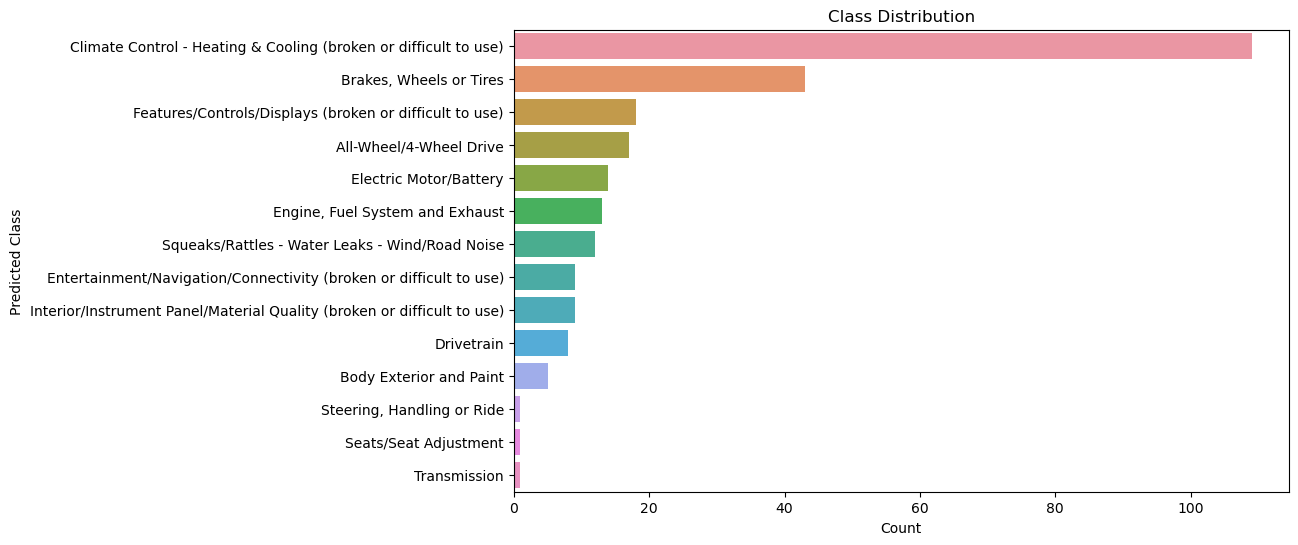

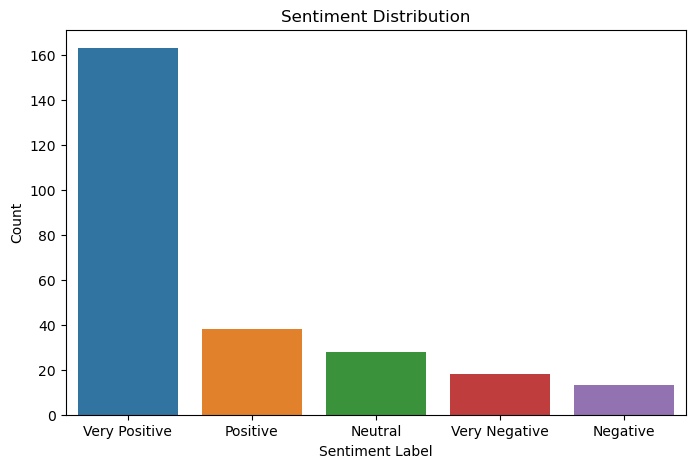

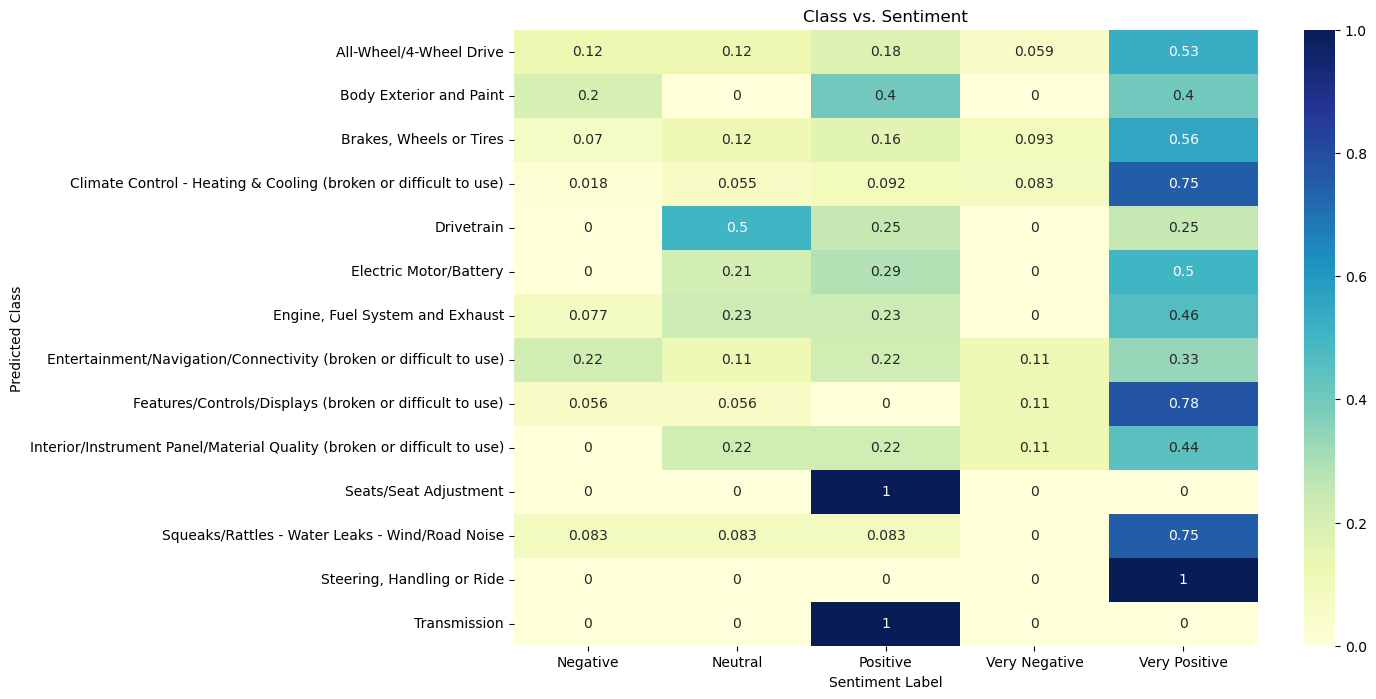

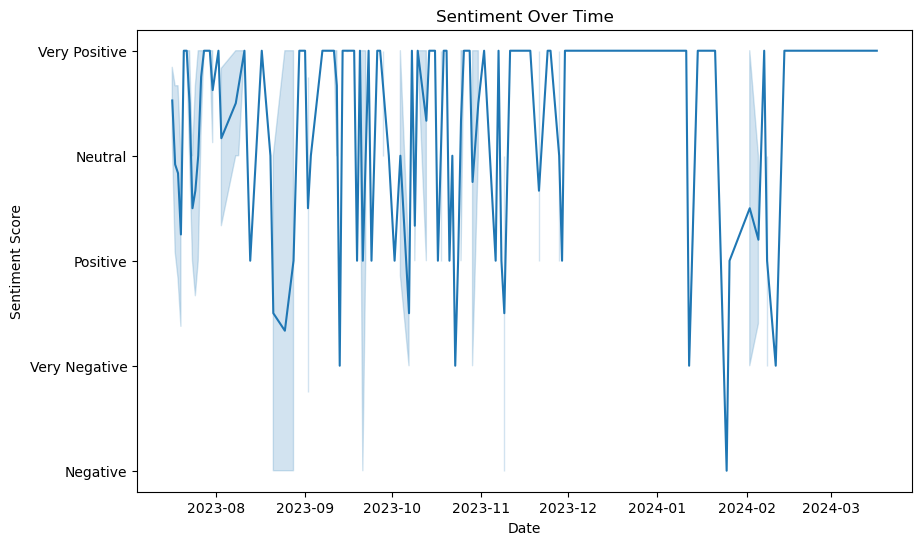

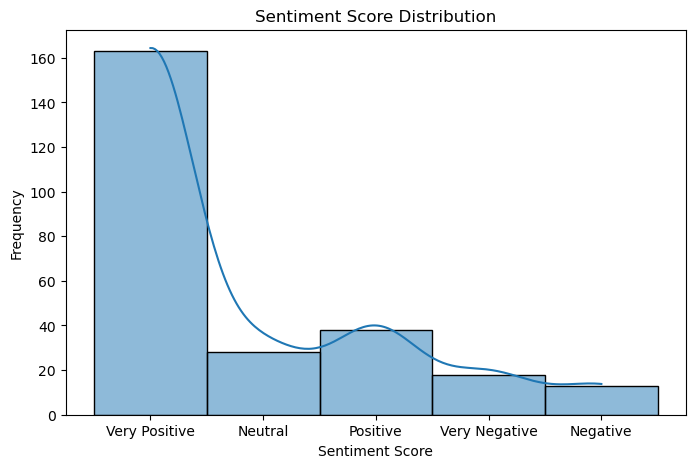

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  # Add this import statement

# Load the provided data
df = pd.read_csv(r"C:\Users\SRIVATSAL NARAYAN\Desktop\nissan_new\team\processed_data\processed_hyundai-exter.csv")

# 1. Class Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='predicted_class', data=df, order=df['predicted_class'].value_counts().index)
plt.title('Class Distribution')
plt.xlabel('Count')
plt.ylabel('Predicted Class')
plt.show()

# 2. Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment_score', data=df, order=df['sentiment_score'].value_counts().index)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

# 3. Class vs. Sentiment
plt.figure(figsize=(12, 8))
sns.heatmap(pd.crosstab(df['predicted_class'], df['sentiment_score'], normalize='index'), cmap='YlGnBu', annot=True)
plt.title('Class vs. Sentiment')
plt.xlabel('Sentiment Label')
plt.ylabel('Predicted Class')
plt.show()

# 4. Sentiment Over Time (if applicable)
# Assuming there's a 'date' column in the DataFrame
plt.figure(figsize=(10, 6))
df['date'] = pd.to_datetime(df['date'])
sns.lineplot(x='date', y='sentiment_score', data=df)
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.show()

# 6. Sentiment Score Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['sentiment_score'], kde=True)
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()



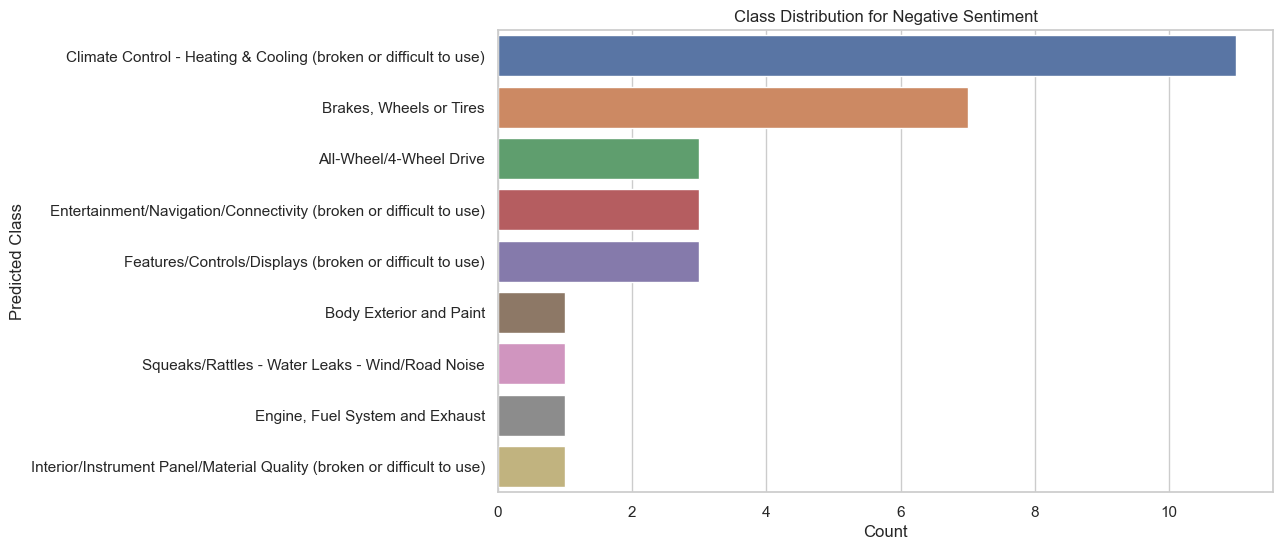

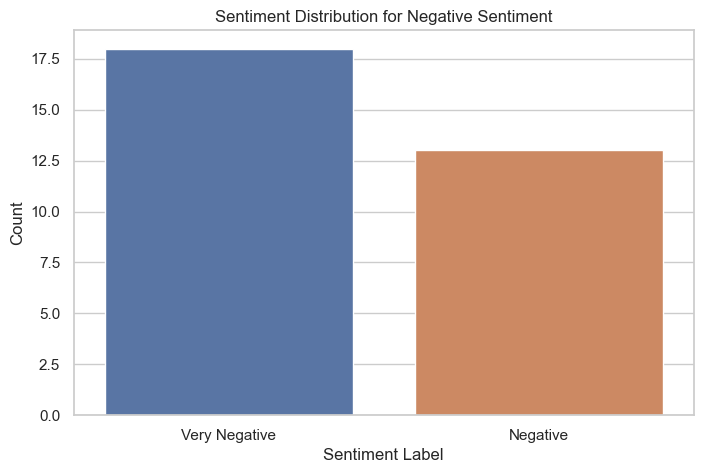

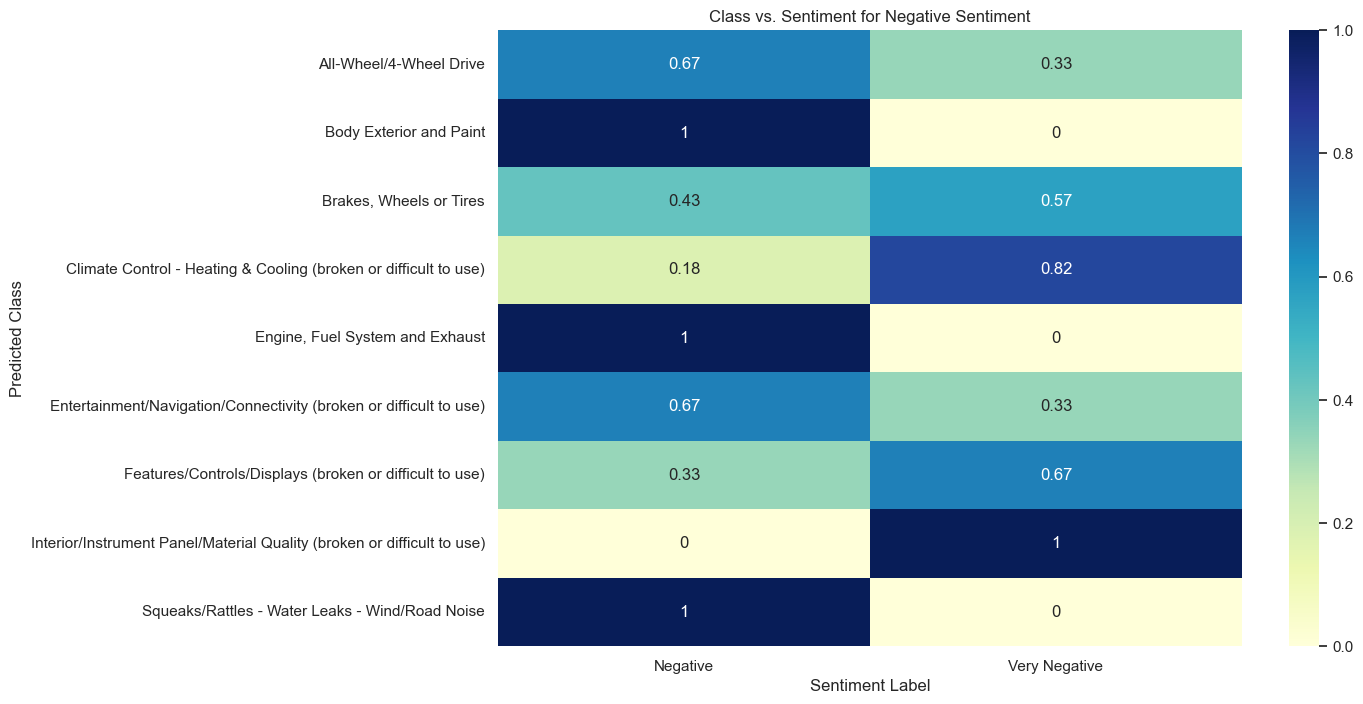

C:\Users\SRIVATSAL NARAYAN\AppData\Local\Temp\ipykernel_21692\2356413133.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_df['date'] = pd.to_datetime(negative_df['date'])


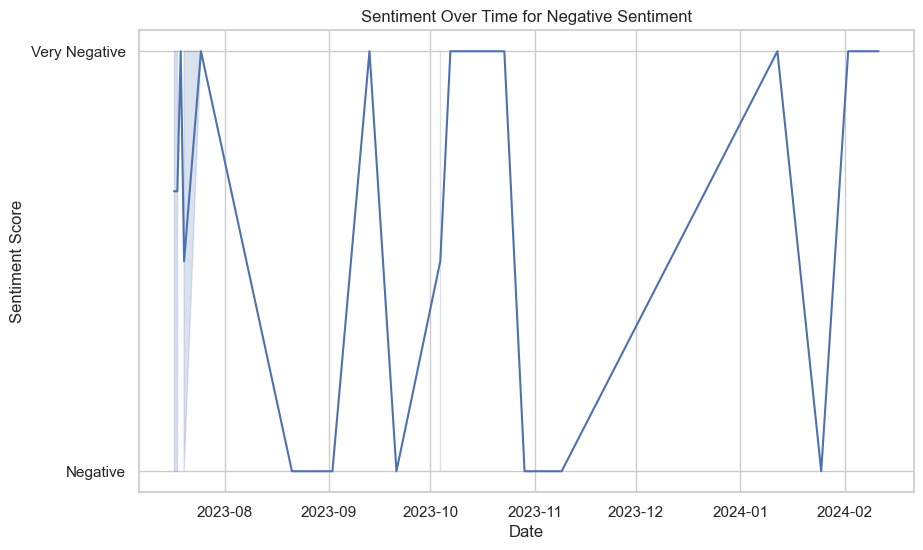

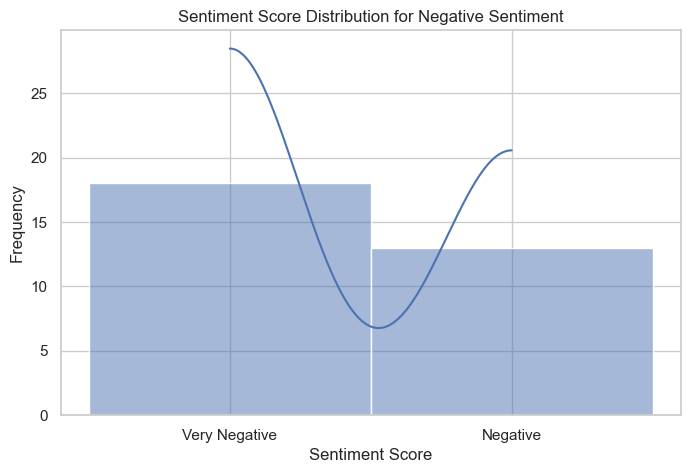

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the provided data
df = pd.read_csv(r"C:\Users\SRIVATSAL NARAYAN\Desktop\nissan_new\team\processed_data\processed_hyundai-exter.csv")

# Filter the DataFrame to include only rows with negative sentiment
negative_df = df[df['sentiment_score'].isin(['Negative', 'Very Negative'])]

# 1. Class Distribution for Negative Sentiment
plt.figure(figsize=(10, 6))
sns.countplot(y='predicted_class', data=negative_df, order=negative_df['predicted_class'].value_counts().index)
plt.title('Class Distribution for Negative Sentiment')
plt.xlabel('Count')
plt.ylabel('Predicted Class')
plt.show()

# 2. Sentiment Distribution for Negative Sentiment
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment_score', data=negative_df, order=negative_df['sentiment_score'].value_counts().index)
plt.title('Sentiment Distribution for Negative Sentiment')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

# 3. Class vs. Sentiment for Negative Sentiment
plt.figure(figsize=(12, 8))
sns.heatmap(pd.crosstab(negative_df['predicted_class'], negative_df['sentiment_score'], normalize='index'), cmap='YlGnBu', annot=True)
plt.title('Class vs. Sentiment for Negative Sentiment')
plt.xlabel('Sentiment Label')
plt.ylabel('Predicted Class')
plt.show()

# 4. Sentiment Over Time for Negative Sentiment (if applicable)
# Assuming there's a 'date' column in the DataFrame
plt.figure(figsize=(10, 6))
negative_df['date'] = pd.to_datetime(negative_df['date'])
sns.lineplot(x='date', y='sentiment_score', data=negative_df)
plt.title('Sentiment Over Time for Negative Sentiment')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.show()

# 6. Sentiment Score Distribution for Negative Sentiment
plt.figure(figsize=(8, 5))
sns.histplot(negative_df['sentiment_score'], kde=True)
plt.title('Sentiment Score Distribution for Negative Sentiment')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


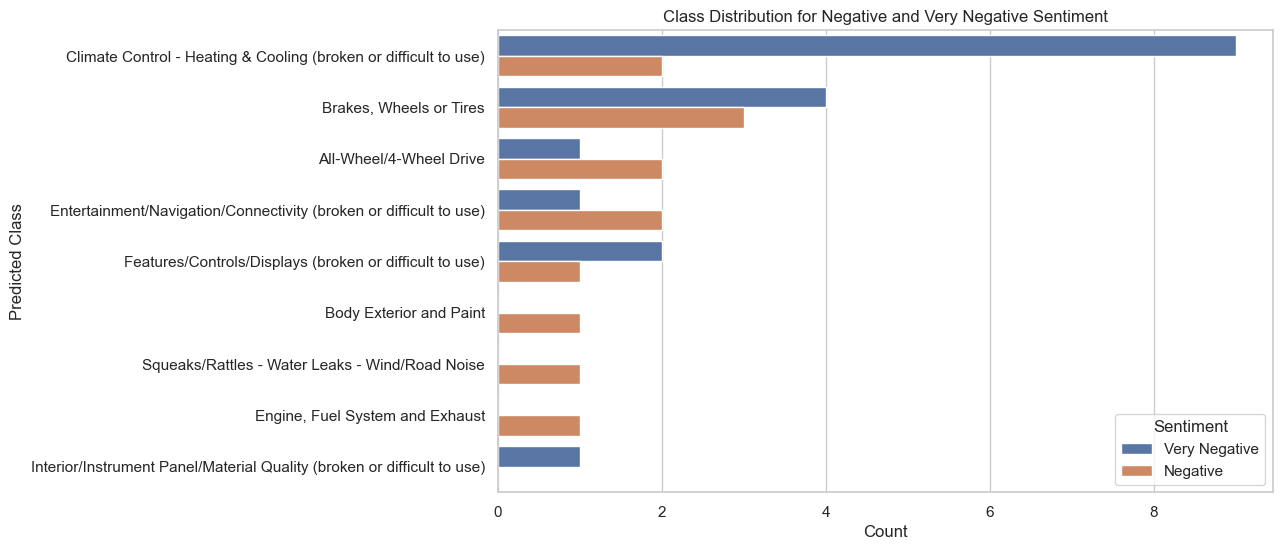

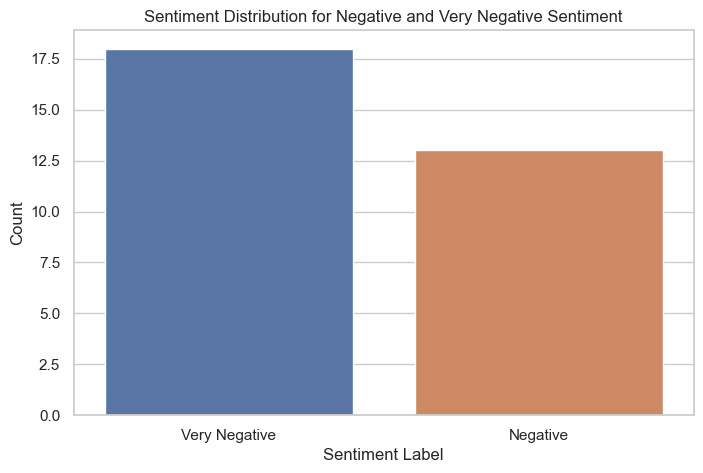

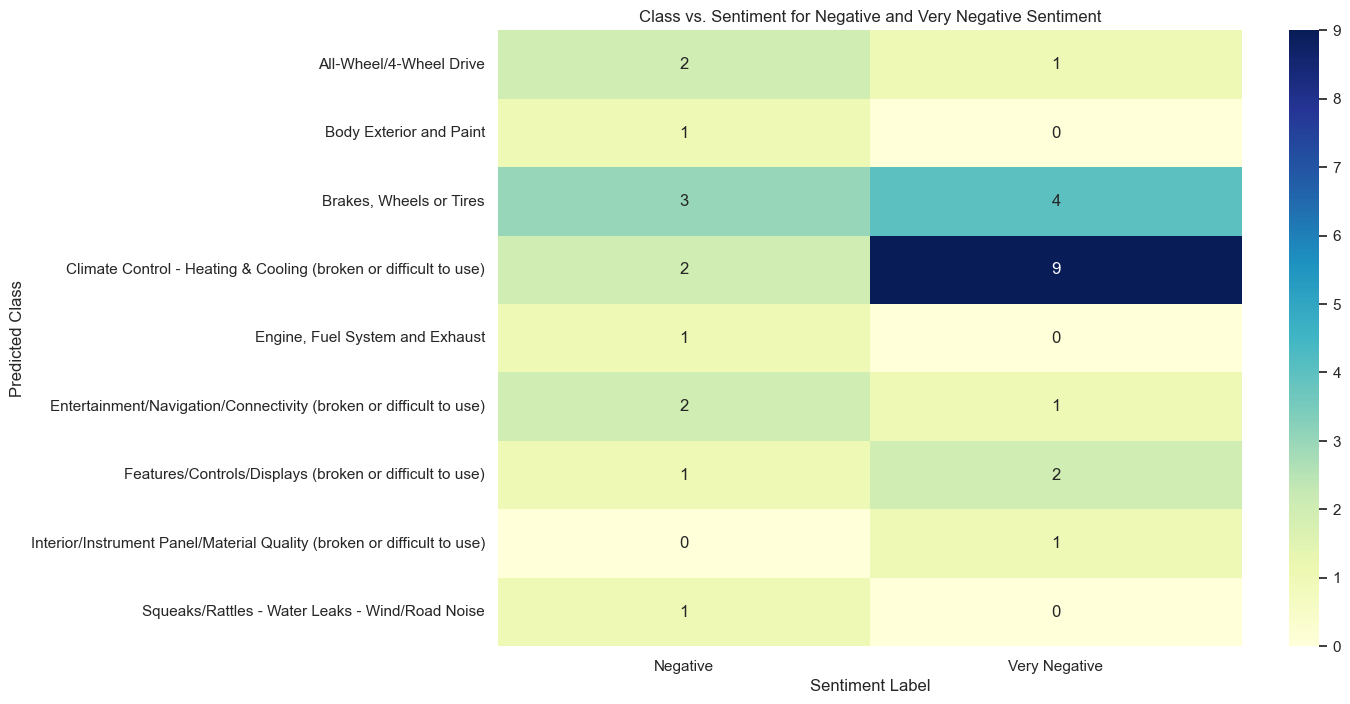

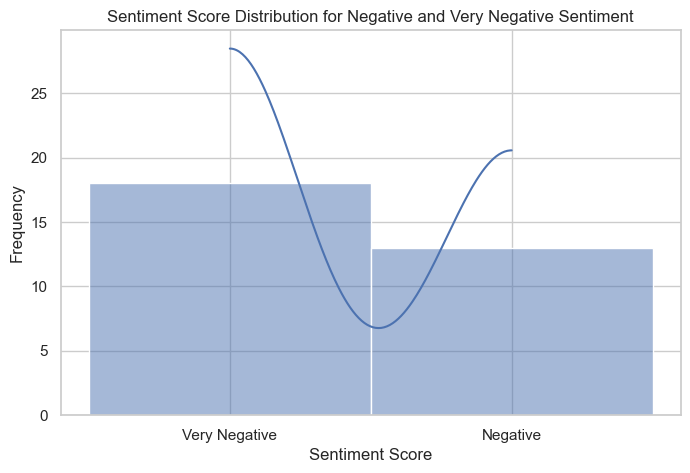

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the provided data
df = pd.read_csv(r"C:\Users\SRIVATSAL NARAYAN\Desktop\nissan_new\team\processed_data\processed_hyundai-exter.csv")

# Filter the DataFrame to include only rows with negative or very negative sentiment
negative_df = df[df['sentiment_score'].isin(['Negative', 'Very Negative'])]

# 1. Class Distribution for Negative and Very Negative Sentiment
plt.figure(figsize=(10, 6))
sns.countplot(y='predicted_class', hue='sentiment_score', data=negative_df, order=negative_df['predicted_class'].value_counts().index)
plt.title('Class Distribution for Negative and Very Negative Sentiment')
plt.xlabel('Count')
plt.ylabel('Predicted Class')
plt.legend(title='Sentiment')
plt.show()

# 2. Sentiment Distribution for Negative and Very Negative Sentiment
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment_score', data=negative_df, order=negative_df['sentiment_score'].value_counts().index)
plt.title('Sentiment Distribution for Negative and Very Negative Sentiment')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

# 3. Class vs. Sentiment for Negative and Very Negative Sentiment
plt.figure(figsize=(12, 8))
sns.heatmap(pd.crosstab(negative_df['predicted_class'], negative_df['sentiment_score']), cmap='YlGnBu', annot=True)
plt.title('Class vs. Sentiment for Negative and Very Negative Sentiment')
plt.xlabel('Sentiment Label')
plt.ylabel('Predicted Class')
plt.show()



# 6. Sentiment Score Distribution for Negative and Very Negative Sentiment
plt.figure(figsize=(8, 5))
sns.histplot(negative_df['sentiment_score'], kde=True)
plt.title('Sentiment Score Distribution for Negative and Very Negative Sentiment')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


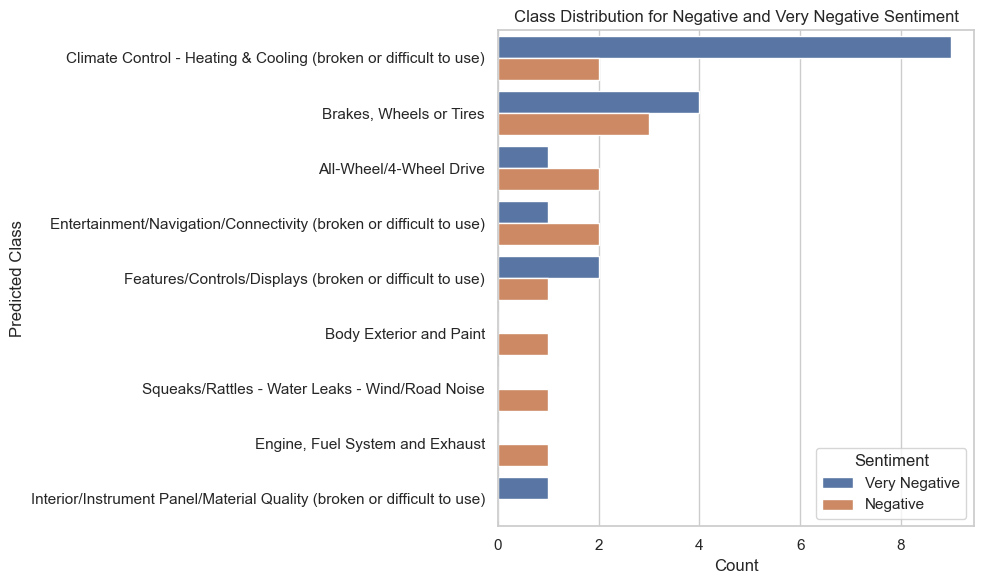

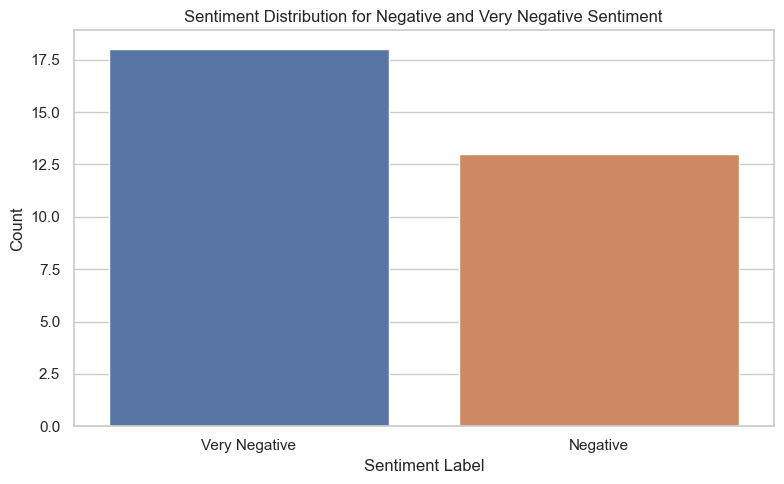

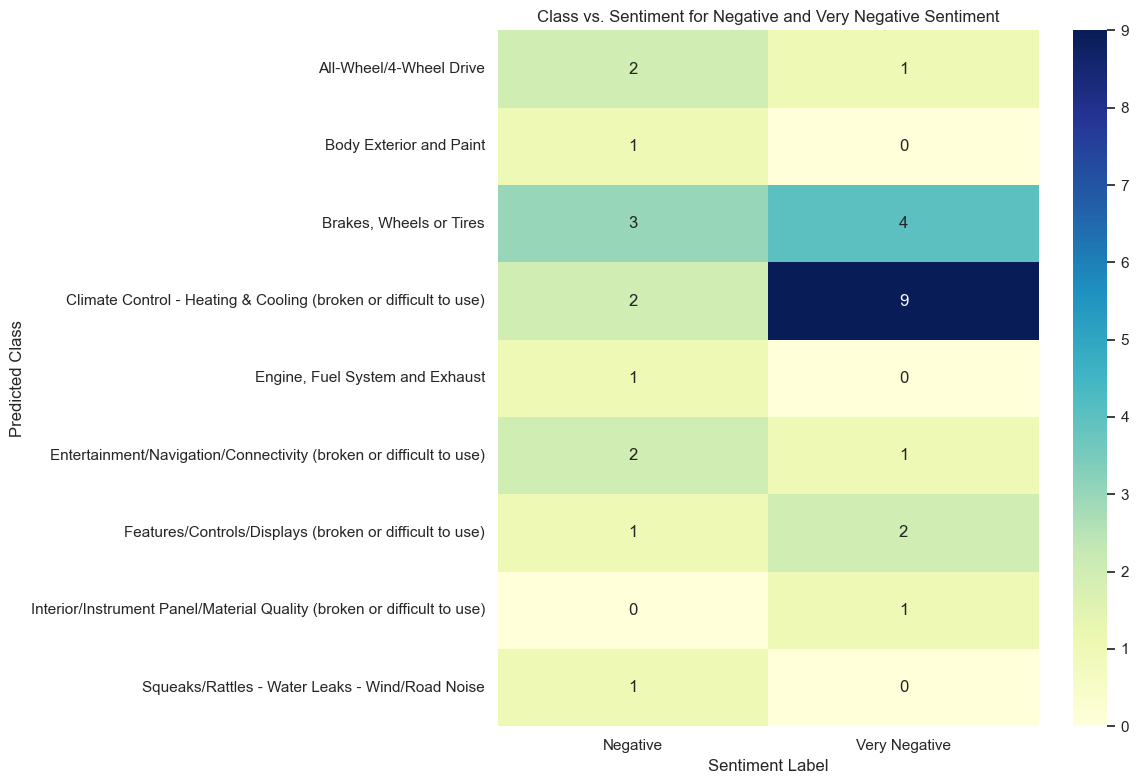

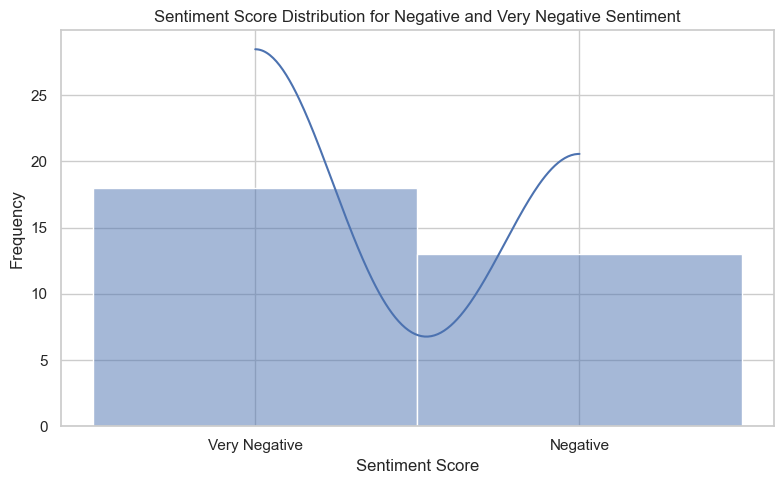

In [26]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the provided data
df = pd.read_csv(r"C:\Users\SRIVATSAL NARAYAN\Desktop\nissan_new\team\processed_data\processed_hyundai-exter.csv")

# Define the folder paths
analysis_folder = r"C:\Users\SRIVATSAL NARAYAN\Desktop\nissan_new\team\analysis"
file_folder = os.path.join(analysis_folder, "processed_hyundai-exter")

# Create the folder structure if it doesn't exist
os.makedirs(file_folder, exist_ok=True)

# Filter the DataFrame to include only rows with negative or very negative sentiment
negative_df = df[df['sentiment_score'].isin(['Negative', 'Very Negative'])]

# Set the style
sns.set(style="whitegrid")

# 1. Class Distribution for Negative and Very Negative Sentiment
plt.figure(figsize=(10, 6))
sns.countplot(y='predicted_class', hue='sentiment_score', data=negative_df, order=negative_df['predicted_class'].value_counts().index)
plt.title('Class Distribution for Negative and Very Negative Sentiment')
plt.xlabel('Count')
plt.ylabel('Predicted Class')
plt.legend(title='Sentiment')
plt.tight_layout()  # Adjust layout to improve label visibility
plt.savefig(os.path.join(file_folder, "class_distribution.png"))  # Save the plot
plt.show()

# 2. Sentiment Distribution for Negative and Very Negative Sentiment
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment_score', data=negative_df, order=negative_df['sentiment_score'].value_counts().index)
plt.title('Sentiment Distribution for Negative and Very Negative Sentiment')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.tight_layout()  # Adjust layout to improve label visibility
plt.savefig(os.path.join(file_folder, "sentiment_distribution.png"))  # Save the plot
plt.show()

# 3. Class vs. Sentiment for Negative and Very Negative Sentiment
plt.figure(figsize=(12, 8))
sns.heatmap(pd.crosstab(negative_df['predicted_class'], negative_df['sentiment_score']), cmap='YlGnBu', annot=True)
plt.title('Class vs. Sentiment for Negative and Very Negative Sentiment')
plt.xlabel('Sentiment Label')
plt.ylabel('Predicted Class')
plt.tight_layout()  # Adjust layout to improve label visibility
plt.savefig(os.path.join(file_folder, "class_vs_sentiment.png"))  # Save the plot
plt.show()

# 6. Sentiment Score Distribution for Negative and Very Negative Sentiment
plt.figure(figsize=(8, 5))
sns.histplot(negative_df['sentiment_score'], kde=True)
plt.title('Sentiment Score Distribution for Negative and Very Negative Sentiment')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()  # Adjust layout to improve label visibility
plt.savefig(os.path.join(file_folder, "sentiment_score_distribution.png"))  # Save the plot
plt.show()


In [27]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the folder paths
data_folder = r"C:\Users\SRIVATSAL NARAYAN\Desktop\nissan_new\team\processed_data"
analysis_folder = r"C:\Users\SRIVATSAL NARAYAN\Desktop\nissan_new\team\analysis"

# Create the analysis folder if it doesn't exist
os.makedirs(analysis_folder, exist_ok=True)

# Get a list of all files in the data folder
data_files = os.listdir(data_folder)

# Loop through each file
for file_name in data_files:
    # Load the data
    file_path = os.path.join(data_folder, file_name)
    df = pd.read_csv(file_path)

    # Create a folder for the file in the analysis folder
    file_folder = os.path.join(analysis_folder, os.path.splitext(file_name)[0])
    os.makedirs(file_folder, exist_ok=True)

    # Filter the DataFrame to include only rows with negative or very negative sentiment
    negative_df = df[df['sentiment_score'].isin(['Negative', 'Very Negative'])]

    # Set the style
    sns.set(style="whitegrid")

    # 1. Class Distribution for Negative and Very Negative Sentiment
    plt.figure(figsize=(10, 6))
    sns.countplot(y='predicted_class', hue='sentiment_score', data=negative_df, order=negative_df['predicted_class'].value_counts().index)
    plt.title('Class Distribution for Negative and Very Negative Sentiment')
    plt.xlabel('Count')
    plt.ylabel('Predicted Class')
    plt.legend(title='Sentiment')
    plt.tight_layout()  # Adjust layout to improve label visibility
    plt.savefig(os.path.join(file_folder, "class_distribution.png"))  # Save the plot
    plt.close()

    # 2. Sentiment Distribution for Negative and Very Negative Sentiment
    plt.figure(figsize=(8, 5))
    sns.countplot(x='sentiment_score', data=negative_df, order=negative_df['sentiment_score'].value_counts().index)
    plt.title('Sentiment Distribution for Negative and Very Negative Sentiment')
    plt.xlabel('Sentiment Label')
    plt.ylabel('Count')
    plt.tight_layout()  # Adjust layout to improve label visibility
    plt.savefig(os.path.join(file_folder, "sentiment_distribution.png"))  # Save the plot
    plt.close()

    # 3. Class vs. Sentiment for Negative and Very Negative Sentiment
    plt.figure(figsize=(12, 8))
    sns.heatmap(pd.crosstab(negative_df['predicted_class'], negative_df['sentiment_score']), cmap='YlGnBu', annot=True)
    plt.title('Class vs. Sentiment for Negative and Very Negative Sentiment')
    plt.xlabel('Sentiment Label')
    plt.ylabel('Predicted Class')
    plt.tight_layout()  # Adjust layout to improve label visibility
    plt.savefig(os.path.join(file_folder, "class_vs_sentiment.png"))  # Save the plot
    plt.close()

    # 6. Sentiment Score Distribution for Negative and Very Negative Sentiment
    plt.figure(figsize=(8, 5))
    sns.histplot(negative_df['sentiment_score'], kde=True)
    plt.title('Sentiment Score Distribution for Negative and Very Negative Sentiment')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.tight_layout()  # Adjust layout to improve label visibility
    plt.savefig(os.path.join(file_folder, "sentiment_score_distribution.png"))  # Save the plot
    plt.close()
